In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import cv2

In [3]:
path = "C:\Temp\BosonCaptures\Boson_Capture.tiff"

In [4]:
cv2.__version__

'3.4.8'

In [5]:
path = "C:\Temp\BosonCaptures\Boson_Capture.tiff"
from PIL import Image 
im = Image.open(path)
img = np.array(im)

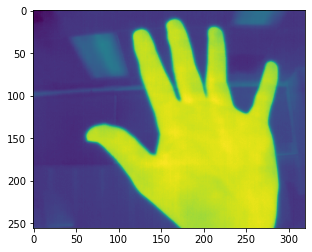

In [6]:
plt.imshow(img)

In [7]:
print(f"Img dtype: {img.dtype}, Img shape: {img.shape}")

Img dtype: uint16, Img shape: (256, 320)


In [8]:
def convert_radiometry(adc_value):
    return adc_value/100-273.15

In [9]:
max_temp = convert_radiometry(np.max(img))
min_temp = convert_radiometry(np.min(img))

print(f"Max temperature: {np.around(max_temp,2)} Celsius, Min Temperature: {np.around(min_temp,2)} Celsius.")

Max temperature: 36.07 Celsius, Min Temperature: 20.1 Celsius.


In [13]:
device_index = 0
cap = cv2.VideoCapture(device_index+cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter.fourcc('Y','1','6',' '))
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 256)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_CONVERT_RGB, 0)

print(cap.isOpened())


framecount=10
frame_buf=[]
for _ in range(framecount): #record indefinitely (until user presses q), replace with "while True"
    stream_ret, frame = cap.read()
    if stream_ret:
        cv2.imshow("image", frame)
        if cv2.waitKey(1) == ord('q'):
            break;
        frame_buf.append(frame)
        
cv2.destroyAllWindows()

#Below is example code to save images to "folder" (Use appropriate directory syntax.)
num=0
print(len(frame_buf))
while len(frame_buf)>0:
    cv2.imwrite(f'C:/Temp/BosonCaptures/cap_{num}.tiff', frame_buf.pop(0))
    num += 1

False
0


In [14]:
path = "C:\Temp\BosonCaptures\cap_1.tiff"
im = cv2.imread(path)
img = np.array(im)

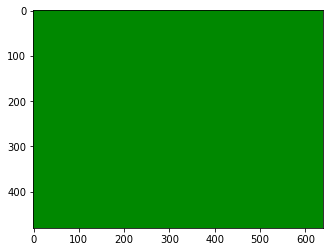

In [12]:
plt.imshow(img)